# 📅 Day 3 — Exploratory Data Analysis (EDA)


## EDA – Importance and Meaning

Exploratory Data Analysis (EDA) is the process of **getting to know your dataset** before applying advanced models or drawing conclusions.  
It is a critical first step in any data analysis workflow because it helps you:

- **Understand structure**: Identify variable types (numerical, categorical, date, text) and the shape of the dataset.  
- **Detect issues**: Spot missing values, inconsistencies, and potential data quality problems.  
- **Summarize key statistics**: Compute central tendencies, spread, correlations, and distributions to build intuition.  
- **Reveal patterns**: Use plots and summaries to see trends, clusters, and group differences.  
- **Identify anomalies**: Highlight unusual points or outliers that may skew results.  
- **Guide decisions**: Inform which cleaning, transformation, or modeling approaches make sense for the dataset.  

Think of EDA as the **detective work** of data analysis. Instead of jumping into advanced models right away, you first explore the dataset to generate hypotheses, validate assumptions, and prepare the ground for deeper analysis.


## Titanic – The Story We Know

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/600px-St%C3%B6wer_Titanic.jpg)

The RMS Titanic was one of the largest and most luxurious ocean liners of its time, celebrated as “unsinkable” when it set sail on its maiden voyage from Southampton to New York in April 1912. Tragically, on the night of April 14th, the ship struck an iceberg in the North Atlantic and sank in the early hours of April 15th. Of the more than 2,200 passengers and crew aboard, over 1,500 lost their lives, making it one of the deadliest peacetime maritime disasters in history.

The Titanic disaster has been studied for decades, not only as a historical event but also as a data source. Passenger records — including age, gender, class, ticket fare, and survival outcome — were compiled from official lists and archives. Today, these records form the basis of the famous **Titanic dataset**, widely used in teaching data analysis and machine learning. It allows us to explore how social and economic factors influenced survival, offering a powerful case study in how data can tell human stories.



## 🛳 The Titanic Dataset

The **Titanic dataset** records information about passengers aboard the RMS Titanic.
It contains a mix of **numerical** and **categorical** variables, as well as **missing data**, **outliers**,
and a **binary target variable** (survival).

We will use Seaborn's built-in Titanic dataset (~891 rows, 15 columns).


In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Key Features in the Seaborn Version
- **survived**: Whether the passenger survived (0 = No, 1 = Yes)  
- **pclass**: Passenger class (1st, 2nd, 3rd)  
- **sex**: Male or female  
- **age**: Age of passenger in years  
- **sibsp**: Number of siblings/spouses aboard  
- **parch**: Number of parents/children aboard  
- **fare**: Ticket fare (in British pounds)  
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **class**: Duplicate categorical version of `pclass`  
- **who**: Man, woman, or child (based on sex and age)  
- **deck**: Cabin deck (many missing)  
- **embark_town**: Full name of embarkation port  
- **alive**: Duplicate categorical version of `survived`  
- **alone**: Whether passenger was alone or not  


## 📚 Instruction (3h)

### 1. Descriptive Statistics


#### Measures of Central Tendency: Mean, Median, Mode
We use measures like mean, median, and mode to summarize central tendencies in data.
For example, average passenger age or the most common embarkation port.

#### Refresher of your statistics

* mean - the average value of a numerical variable
* median - the middle value when data is sorted
* mode - the most frequently occurring value in a variable


In [2]:

# Mean, Median, Mode examples
print("Mean age:", titanic['age'].mean())
print("Median age:", titanic['age'].median())
print("Mode embark_town:", titanic['embark_town'].mode()[0])


Mean age: 29.69911764705882
Median age: 28.0
Mode embark_town: Southampton



#### Measures of Spread: Variance, Standard Deviation, Quartiles
Spread measures help us understand variability in the dataset.
Titanic fares vary widely across classes.

#### Refresher of your statistics

* variance - the average of the squared differences from the mean
* standard deviation - the square root of variance, indicating typical deviation from the mean
* quartiles - values that divide the data into four equal parts (Q1, Q2/median, Q3, IQR)

In [3]:

print("Fare variance:", titanic['fare'].var())
print("Fare standard deviation:", titanic['fare'].std())
print("Fare quartiles:")
print(titanic['fare'].describe()[4:7])


Fare variance: 2469.436845743117
Fare standard deviation: 49.693428597180905
Fare quartiles:
25%     7.9104
50%    14.4542
75%    31.0000
Name: fare, dtype: float64



#### Skewness & Kurtosis
Skewness shows asymmetry in distributions, while kurtosis measures tail heaviness.

#### Refresher of your statistics

* skewness - a measure of asymmetry in a distribution (positive = right tail, negative = left tail)
* kurtosis - a measure of the "tailedness" of a distribution (high kurtosis = heavy tails, low kurtosis = light tails)

More on formulas for these on wiki: 
* https://en.wikipedia.org/wiki/Skewness
* https://en.wikipedia.org/wiki/Kurtosis


In [4]:

print("Fare skewness:", titanic['fare'].skew())
print("Fare kurtosis:", titanic['fare'].kurt())


Fare skewness: 4.787316519674893
Fare kurtosis: 33.39814088089868


### Interpretation of Skewness and Kurtosis
- **Skewness**: A skewness value greater than 0 indicates a right-skewed distribution, while a value less than 0 indicates a left-skewed distribution. A value close to 0 suggests a symmetric distribution.
- **Kurtosis**: A kurtosis value greater than 3 indicates a distribution with heavier tails than a normal distribution (leptokurtic), while a value less than 3 indicates lighter tails (platykurtic). A kurtosis of exactly 3 corresponds to a normal distribution (mesokurtic).

### Descriptive Statistics versus Visualizations

- Descriptive statistics provide numerical summaries of data, while visualizations offer graphical representations.
- Statistics give precise measures (e.g., mean, median), while visualizations reveal patterns, trends, and outliers.
- Both are complementary: statistics quantify, while visualizations illustrate.



### 2. Distribution Exploration

#### Histograms

Histograms show the distribution of numerical variables.
For example, the age distribution of Titanic passengers.

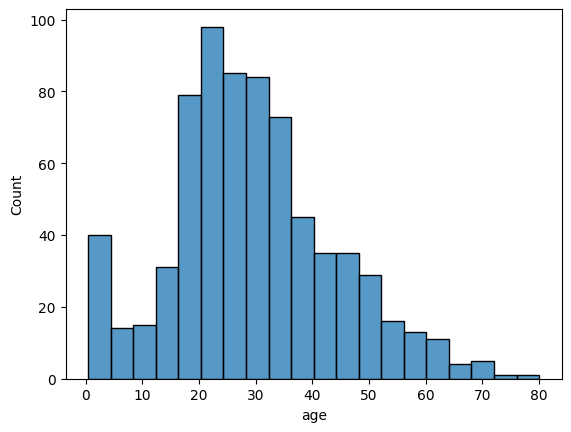

In [5]:
sns.histplot(titanic['age'].dropna(), bins=20, kde=False);

#### Density Plots

Density plots provide a smoothed estimate of the distribution.
They help visualize the shape of the distribution without binning artifacts.

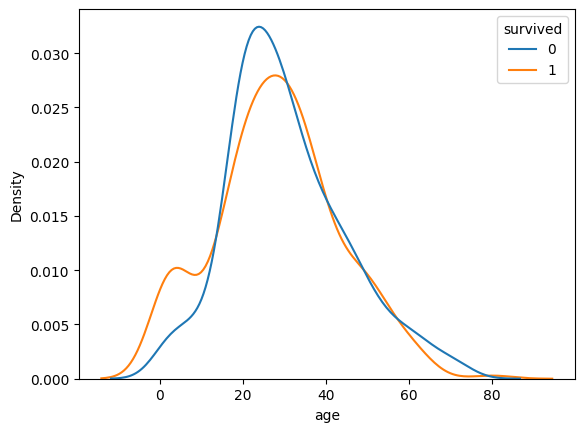

In [6]:
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False);

#### Boxplots

Boxplots summarize distributions and highlight outliers.
They show median, quartiles, and potential outliers in fare by passenger class.

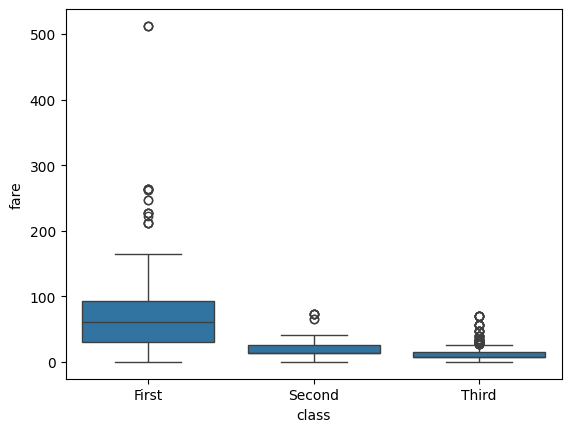

In [7]:
sns.boxplot(data=titanic, x='class', y='fare');

### 3. Outlier Detection

#### Boxplots & Scatterplots

Boxplots and scatterplots help identify outliers in numerical data.
For instance, unusually high fares paid by some passengers.

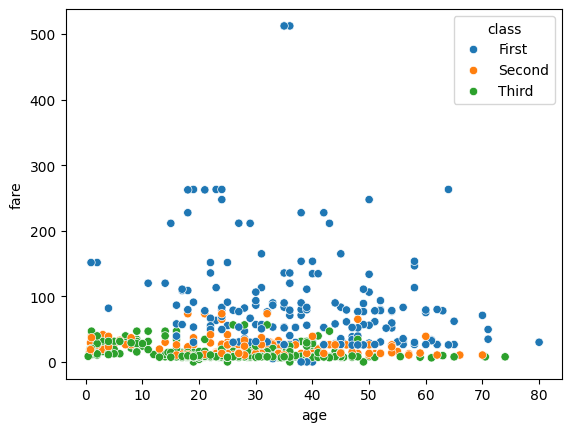

In [8]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class');

#### IQR Method

The Interquartile Range (IQR) method identifies outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.    

Definition of IQR: IQR = Q3 - Q1, where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).
Wiki reference: https://en.wikipedia.org/wiki/Interquartile_range

![IQR](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

In [9]:

Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = titanic[(titanic['fare'] < Q1 - 1.5*IQR) | (titanic['fare'] > Q3 + 1.5*IQR)]
print("Outliers count:", len(outliers))


Outliers count: 116


### 4. Correlation Analysis

Correlation measures the strength and direction of relationships between numerical variables.
#### Correlation Matrix
A correlation matrix shows pairwise correlations between numerical variables.

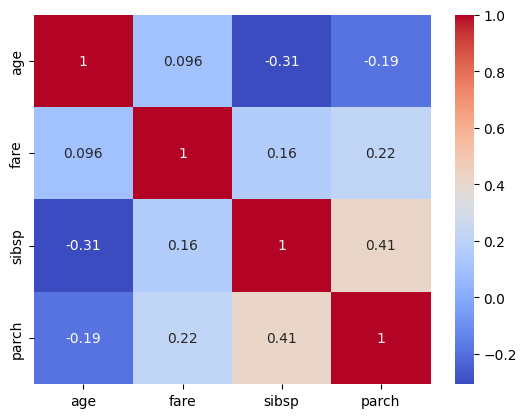

In [10]:

corr = titanic[['age','fare','sibsp','parch']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm');


### 5. Grouping & Aggregation

Grouping and aggregation summarize data by categories.

The `groupby` function in Pandas allows you to group data by one or more categorical variables and then apply aggregation functions (like mean, sum, count) to summarize the data within each group.

#### Similarity to SQL's GROUP BY
Pandas' `groupby` function is similar to SQL's `GROUP BY` clause, allowing aggregation of data based on categorical variables.

In [11]:

# Survival rates by sex
print(titanic.groupby('sex')['survived'].mean())

# Multiple statistics on fares by class
print(titanic.groupby('class')['fare'].agg(['mean','median','count']))


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64
             mean   median  count
class                            
First   84.154687  60.2875    216
Second  20.662183  14.2500    184
Third   13.675550   8.0500    491


/tmp/ipython-input-2110100083.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic.groupby('class')['fare'].agg(['mean','median','count']))


#### Pivot Tables

Pivot tables provide a multi-dimensional summary of data, allowing you to aggregate and analyze data across multiple categorical variables simultaneously.

#### Crosstab in Pandas

Crosstab is a specific type of pivot table that computes a simple cross-tabulation of two (or more) factors. It is often used to analyze the relationship between categorical variables.

Below we analyze survival rates by passenger class and gender.

In [12]:

pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 6. Missing Data Analysis

#### Identifying Missing Data

We identify missing data using functions like `isnull()` and `sum()` in Pandas.



In [13]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 7. Chi-Squared Test for Categorical Variables

Chi-squared test assesses associations between categorical variables.

#### Chi-Squared Test Overview

- The Chi-squared test evaluates whether there is a significant association between two categorical variables.
- It compares observed frequencies in each category to the frequencies expected if there were no association.


#### Pandas `crosstab` and `chi2_contingency`

- We can use `pandas.crosstab` to create a contingency table of observed frequencies.
- The `scipy.stats.chi2_contingency` function performs the Chi-squared test on the contingency table.

#### Interpreting Chi-Squared Results

- The test returns a Chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
- A low p-value (typically < 0.05) indicates a significant association between the variables.
#### Example

```python
import pandas as pd
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")
```

More on Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test


## 📝 Exercise (30–45 min)

Using the Titanic dataset, complete the following tasks:

1. Compute survival rates by **embark_town** and **class**.  
2. Plot the age distribution for survivors vs non-survivors using **histograms** or **density plots**.  
3. Detect outliers in **age** using the IQR method and comment on findings.  
4. Create a new feature `family_size = sibsp + parch + 1`. Analyze its relationship with survival.  
5. Use a **pivot table** to display survival rates by **sex** and **class**. What patterns do you see?  
6. (Optional, for advanced) Perform a **chi-square test** on survival vs sex to test independence.  



## 🔄 Reflection

- What surprised you most about Titanic passenger survival patterns?  
- How do categorical vs numerical features require different EDA approaches?  
- How could EDA guide the next steps in modeling or prediction?  



## 📚 Additional Sources for Further EDA Work

- Wes McKinney, *Python for Data Analysis*  
- Jake VanderPlas, *Python Data Science Handbook*  
- YData Profiling: [https://ydata-profiling.ydata.ai](https://ydata-profiling.ydata.ai)  
- Seaborn Documentation: [https://seaborn.pydata.org](https://seaborn.pydata.org)  
